In [361]:
import numpy as np
from sklearn import datasets 

diabetes = datasets.load_diabetes()
X_train = diabetes.data[:242]
y_train = diabetes.target[:242]
X_test = diabetes.data[242:]
y_test = diabetes.target[242:]

# adding an intercep 
X_train_b = np.ones((X_train.shape[0], X_train.shape[1] + 1))
X_train_b[:,1:] = X_train
X_test_b = np.ones((X_test.shape[0], X_test.shape[1] + 1))
X_test_b[:,1:] = X_test

In [362]:
#1

w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

w_b = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T.dot(y_train))

def RMSE(X, y, w):
    N = y.shape[0]
    rmse = 0
    
    for i in range(N):
        rmse = rmse + (y[i] - w.dot(X[i]))**2
    
    return 1/N*rmse**(1/2)
print('a) Without using an intercept:')
print(f'RMSE_train = {RMSE(X_train, y_train, w)}')
print(f'RMSE_test = {RMSE(X_test, y_test, w)}\n')

print('b) With using an intercept:')
print(f'RMSE_train = {RMSE(X_train_b, y_train, w_b)}')
print(f'RMSE_test = {RMSE(X_test_b, y_test, w_b)}')

a) Without using an intercept:
RMSE_train = 10.251699894543384
RMSE_test = 11.891351400282694

b) With using an intercept:
RMSE_train = 3.456819930717368
RMSE_test = 3.8135448131746994


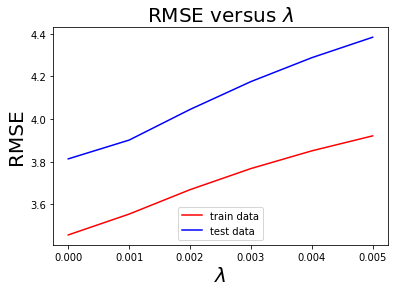

In [363]:
#2

import matplotlib.pyplot as plt

L = np.arange(0, 0.006, 0.001)
rmse_train = np.zeros(L.shape)
rmse_test = np.zeros(L.shape)

for i in range(L.shape[0]):
    w_b = np.linalg.inv(X_train_b.T.dot(X_train_b) + X_train_b.shape[0]*L[i]*np.eye(X_train_b.shape[1])).dot(X_train_b.T.dot(y_train))
    rmse_train[i] = RMSE(X_train_b, y_train, w_b)
    rmse_test[i] = RMSE(X_test_b, y_test, w_b)

plt.plot(L, rmse_train, c = 'r', label = 'train data')
plt.plot(L, rmse_test, c = 'b', label = 'test data')
plt.title(r'RMSE versus $\lambda$', fontsize= '20')
plt.xlabel(r'$\lambda$', size = 20)
plt.ylabel(r'RMSE', size = 20)
plt.legend(loc='lower center', fontsize = '10')
plt.show()

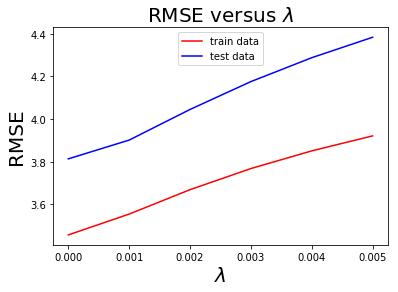

In [364]:
#3

from scipy.optimize import minimize

def J_train(w):
    N = X_train_b.shape[0]
    s = 0
    
    for i in range(N):
        s = s + (y_train[i] - w.dot(X_train_b[i]))**2
    
    return s/2/N + L[j]/2*np.linalg.norm(w)**2

def dJ_train(w):
    N = X_train_b.shape[0]
    s = 0
    
    for i in range(N):
        s = s + (w.dot(X_train_b[i]) - y_train[i])*X_train_b[i]
        
    return s/N + L[j]*w
    
for j in range(L.shape[0]):
    w_b = minimize(J_train, np.zeros(X_train_b.shape[1]), jac = dJ_train, method = 'CG').x 
    rmse_train[i] = RMSE(X_train_b, y_train, w_b)
    rmse_test[i] = RMSE(X_test_b, y_test, w_b)

plt.plot(L, rmse_train, c = 'r', label = 'train data')
plt.plot(L, rmse_test, c = 'b', label = 'test data')
plt.title(r'RMSE versus $\lambda$', fontsize= '20')
plt.xlabel(r'$\lambda$', size = 20)
plt.ylabel(r'RMSE', size = 20)
plt.legend(loc='upper center', fontsize = '10')
plt.show()

In [365]:
#4

from scipy.io import loadmat
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

data_train = loadmat('ijcnn_train.mat')
data_test = loadmat('ijcnn_test.mat')
X_train = scipy.sparse.csc_matrix.toarray(data_train['ijcnn_data'])
y_train = np.zeros(data_train['ijcnn_label'].shape[0])
for i in range(y_train.shape[0]):
    y_train[i] = data_train['ijcnn_label'][i, 0]
X_test = scipy.sparse.csc_matrix.toarray(data_test['test_data'])
y_test = np.zeros(data_test['test_label'].shape[0])
for i in range(y_test.shape[0]):
    y_test[i] = data_test['test_label'][i, 0]

#X_train_s = preprocessing.scale(X_train, with_mean=False)
#X_test_s = preprocessing.scale(X_test, with_mean=False)

def J_train(w):
    N = X_train.shape[0]
    s = 0
    
    for i in range(N):
        s = s + np.log(1 + np.exp(-y_train[i]*w.dot(X_train[i])))
    
    return s/N

def dJ_train(w):
    N = X_train.shape[0]
    s = 0
    
    for i in range(N):
        s = s + y_train[i]*np.exp(-y_train[i]*w.dot(X_train[i]))/(1 + np.exp(-y_train[i]*w.dot(X_train[i])))*X_train[i]
        
    return -s/N

w = minimize(J_train, np.zeros(X_train.shape[1]), jac = dJ_train, method = 'CG').x

y_pred = np.zeros(y_test.shape[0])

for i in range(X_test.shape[0]):
    if 1/(1 + np.exp(-w.dot(X_test[i]))) >= 1/(1 + np.exp(w.dot(X_test[i]))):
        y_pred[i] = 1
    else:
        y_pred[i] = -1
        
print(f'Accuracy = {accuracy_score(y_test, y_pred)}')

Accuracy = 0.9201862575108232


C:\Users\kuany\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* Using linear kernel (all other parameters are kept default):
  Accuracy of prediction with respect to training data: 0.9241648329665934
  Accuracy of prediction with respect to testing data: 0.9211349930753209

* Using radial basis function with value of gamma setting to 1 (all other parameters are kept default):
  Accuracy of prediction with respect to training data: 0.9808961792358472
  Accuracy of prediction with respect to testing data: 0.983991450474913



C:\Users\kuany\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


* Using radial basis function with value of gamma setting to default (all other parameters are kept default):
  Accuracy of prediction with respect to training data: 0.9282056411282257
  Accuracy of prediction with respect to testing data: 0.9278960970981778

* Using radial basis function with value of gamma setting 1 (all other parameters are kept default):


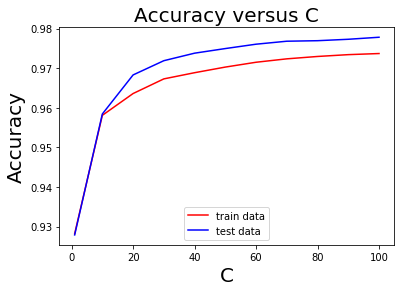

In [371]:
#5

from sklearn.svm import SVC

data_train = loadmat('ijcnn_train.mat')
data_test = loadmat('ijcnn_test.mat')
X_train = data_train['ijcnn_data']
y_train = data_train['ijcnn_label']
X_test = data_test['test_data']
y_test = data_test['test_label']

#a
clf1 = SVC(kernel = 'linear')
clf1.fit(X_train, y_train)
print('* Using linear kernel (all other parameters are kept default):')
print(f'  Accuracy of prediction with respect to training data: {clf1.score(X_train, y_train)}')
print(f'  Accuracy of prediction with respect to testing data: {clf1.score(X_test, y_test)}\n')

#b
clf2 = SVC(kernel = 'rbf', gamma = 1)
clf2.fit(X_train, y_train)
print('* Using radial basis function with value of gamma setting to 1 (all other parameters are kept default):')
print(f'  Accuracy of prediction with respect to training data: {clf2.score(X_train, y_train)}')
print(f'  Accuracy of prediction with respect to testing data: {clf2.score(X_test, y_test)}\n')

#c 
clf3 = SVC(kernel = 'rbf')
clf3.fit(X_train, y_train)
print('* Using radial basis function with value of gamma setting to default (all other parameters are kept default):')
print(f'  Accuracy of prediction with respect to training data: {clf3.score(X_train, y_train)}')
print(f'  Accuracy of prediction with respect to testing data: {clf3.score(X_test, y_test)}\n')

#d
C = np.arange(11)*10
C[0] = 1

train_acc = np.zeros(C.shape)
test_acc = np.zeros(C.shape)

for i in range(C.shape[0]): 
    clf = SVC(C = C[i], kernel = 'rbf')
    clf.fit(X_train, y_train)
    train_acc[i] = clf.score(X_train, y_train)
    test_acc[i] = clf.score(X_test, y_test)
print('* Using radial basis function with value of gamma setting 1 (all other parameters are kept default):')
#print(f'  Accuracy of prediction with respect to training data: {clf.score(X_train, y_train)}')
#print(f'  Accuracy of prediction with respect to testing data: {clf.score(X_test, y_test)}\n')

plt.plot(C, train_acc, c = 'r', label = 'train data')
plt.plot(C, test_acc, c = 'b', label = 'test data')
plt.title(r'Accuracy versus C', fontsize= '20')
plt.xlabel(r'C', size = 20)
plt.ylabel(r'Accuracy', size = 20)
plt.legend(loc='lower center', fontsize = '10')
plt.show()